In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import adjusted_rand_score

In [10]:
data_maintenance= pd.read_csv("data_maintenance.csv")

In [11]:
data_maintenance = data_maintenance.drop('Unnamed: 0', axis=1)

In [18]:
data_maintenance

,customer_unique_id,recence,fréquence,payment_value,review_score,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,5.0,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4.0,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,541,1,86.22,3.0,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,4.0,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,5.0,2017-11-14 19:45:42
...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,5.0,2017-06-08 21:00:36
94453,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,4.0,2017-12-10 20:07:56
94454,ffff371b4d645b6ecea244b27531430a,572,1,112.46,5.0,2017-02-07 15:49:16
94455,ffff5962728ec6157033ef9805bacc48,123,1,133.69,5.0,2018-05-02 15:17:41


In [13]:
print("Date du dernier achat", data_maintenance.order_purchase_timestamp.max())
print("Date du premier achat", data_maintenance.order_purchase_timestamp.min())

Date du dernier achat 2018-09-03 09:06:57
Date du premier achat 2016-09-04 21:15:19


In [20]:
data_maintenance["order_purchase_timestamp"] = pd.to_datetime(data_maintenance["order_purchase_timestamp"])


In [21]:
clients_date10 = data_maintenance[(data_maintenance["order_purchase_timestamp"] < datetime(2017, 12 , 31))]

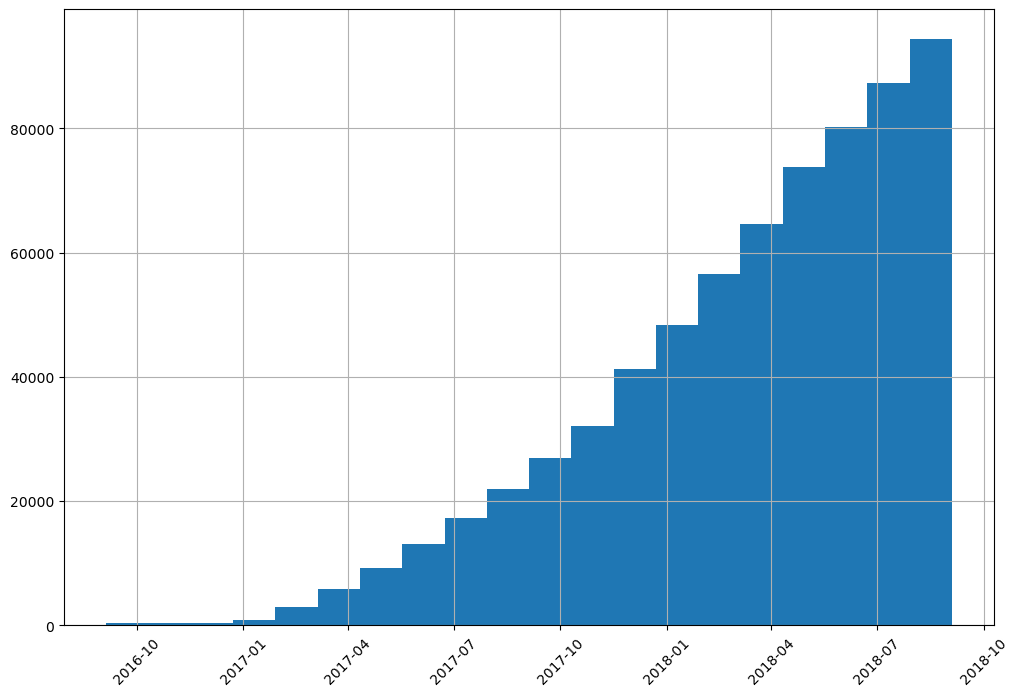

In [41]:
fig=plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
data_maintenance["order_purchase_timestamp"].hist(bins=20, cumulative= True, density= False)
plt.show()

In [24]:
clients_date_drop = clients_date10.dropna()
clients_date_drop.sort_values("order_purchase_timestamp")

,customer_unique_id,recence,fréquence,payment_value,review_score,order_purchase_timestamp
67933,b7d76e111c89f7ebf14761390f0f7d17,728,1,136.23,1.0,2016-09-04 21:15:19
26784,4854e9b3feff728c13ee5fc7d1547e92,728,1,75.06,1.0,2016-09-05 00:15:34
5425,0eb1ee9dba87f5b36b4613a65074337c,700,1,109.34,1.0,2016-10-02 22:07:52
17582,2f64e403852e6893ae37485d5fcacdaf,699,1,39.09,4.0,2016-10-03 16:56:50
68279,b8b8726af116a5cfb35b0315ecef9172,699,1,35.61,1.0,2016-10-03 21:01:41
...,...,...,...,...,...,...
92914,fbd10bdfa725fd272755f9dd98752105,246,1,138.26,4.0,2017-12-30 21:44:05
66081,b2b779eb0dedff7f9eef0770287a9979,246,1,51.75,1.0,2017-12-30 22:07:13
72334,c3bbb44403eaca0b1a298510aa9cdae6,246,1,55.24,5.0,2017-12-30 22:29:45
17554,2f53681bf01c5cff02bada5809fe302e,246,1,102.87,5.0,2017-12-30 22:51:13


In [25]:
b0 = clients_date_drop[['fréquence','recence','payment_value','review_score']]

In [26]:
std_0 = StandardScaler().fit(b0)
date0_std = std_0.transform(b0)

In [29]:
model_0 = KMeans(n_clusters=5).fit(date0_std)

C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\clust

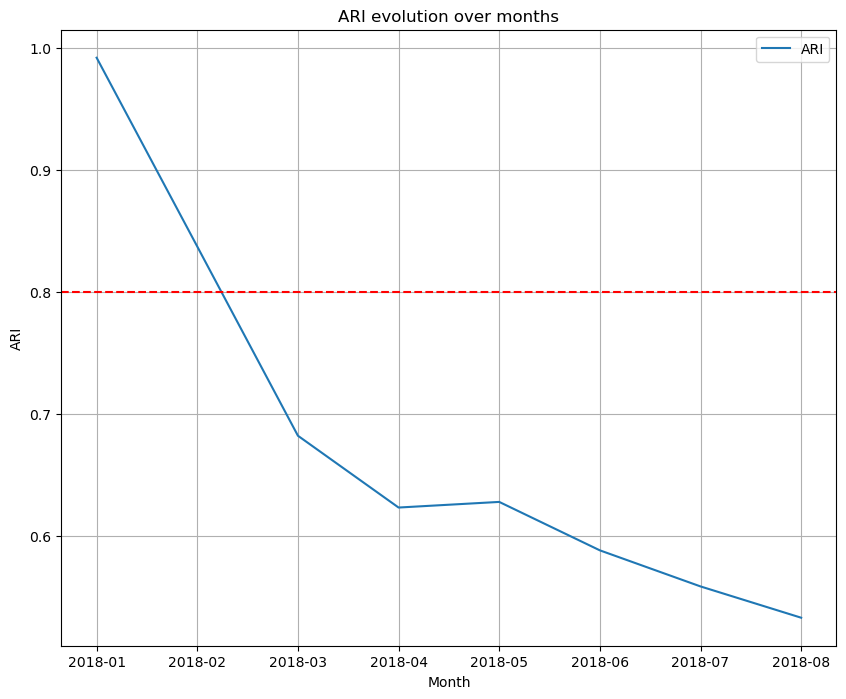

In [40]:
def process_monthly_data_cumulative(df, model_0, std_0, n_clusters=5):
    X = df[['fréquence', 'recence', 'payment_value', 'review_score']]
    X_std_0 = std_0.transform(X)
    labels_0 = model_0.predict(X_std_0)
    
    std = StandardScaler().fit(X)
    X_std = std.transform(X)
    model = KMeans(n_clusters=n_clusters).fit(X_std)
    labels = model.predict(X_std)
    
    return adjusted_rand_score(labels_0, labels)

dates = [
    datetime(2018, 1, 1),
    datetime(2018, 2, 1),
    datetime(2018, 3, 1),
    datetime(2018, 4, 1),
    datetime(2018, 5, 1),
    datetime(2018, 6, 1),
    datetime(2018, 7, 1),
    datetime(2018, 8, 1)
]

ari_results = {}

for date in dates:
    date_range = data_maintenance[data_maintenance["order_purchase_timestamp"] < date]
    date_range_drop = date_range.dropna()
    
    ari = process_monthly_data_cumulative(date_range_drop, model_0, std_0)
    ari_results[date.strftime("%Y-%m")] = ari

ari_df = pd.DataFrame(list(ari_results.items()), columns=['Month', 'ARI'])
ax = ari_df.plot(x='Month', y='ARI', kind='line', title="ARI evolution over months", ylabel="ARI",figsize=(10, 8))
ax.grid(True)
ax.axhline(y=0.8, color='r', linestyle='--')
plt.show()

In [42]:
ari_results

{'2018-01': 0.9923231295461841,
 '2018-02': 0.8373117673283236,
 '2018-03': 0.6820215410040537,
 '2018-04': 0.6230848791908785,
 '2018-05': 0.6277021130554848,
 '2018-06': 0.587937217057098,
 '2018-07': 0.5583239595357334,
 '2018-08': 0.5326392544896735}

# Conclusion

- Création de 5 clusters à l'aide de K-means.
- Actualisation de la segmentation à faire tous les 40 jours.


Solutions marketing possible : 
- Bon de réduction pour les clients fidèles en fonction des produits qu'ils ont déjà achetés. 
- Programme de fidélité pour les nouveaux clients, visant à les inciter à commander davantage. 
- Livraison gratuite à partir d'un certain montant ou d'un certain nombre de produits, dans le but d'augmenter le prix ou le nombre de produits moyen dans le panier.
